<a href="https://colab.research.google.com/github/MuhammadHassan667410/131-Days-of-AI/blob/main/Day%2029%20to%2033(Unsupervised%20ML)/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Downloads/Instagram visits clustering.csv')

In [ ]:
data

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397
...,...,...,...
2595,2595,25,25.745908
2596,2596,52,9.275066
2597,2597,100,84.999487
2598,2598,87,20.530806


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Instagram visit score'] = scaler.fit_transform(data[['Instagram visit score']])
data['Spending_rank(0 to 100)'] = scaler.fit_transform(data[['Spending_rank(0 to 100)']])


In [ ]:
data

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0.000000,0.513274,0.217181
1,0.000385,0.495575,0.228200
2,0.000770,0.876106,0.165282
3,0.001154,0.681416,0.807727
4,0.001539,0.079646,0.287115
...,...,...,...
2595,0.998461,0.176991,0.233112
2596,0.998846,0.415929,0.078324
2597,0.999230,0.840708,0.789958
2598,0.999615,0.725664,0.184102


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_range = range(1,15)
sse = []
for k in k_range:
    km = KMeans(n_clusters= k)
    km.fit(data[['Instagram visit score', 'Spending_rank(0 to 100)']])
    sse.append(km.inertia_)

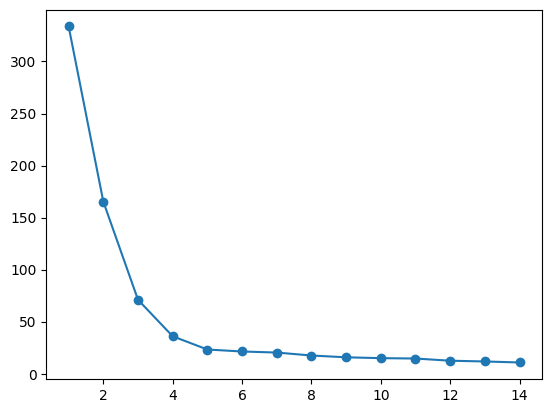

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_range, sse, marker='o')

In [ ]:
KM = KMeans(n_clusters= 5)
y_pred = KM.fit_predict(data[['Instagram visit score', 'Spending_rank(0 to 100)']])

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 0, 4], shape=(2600,), dtype=int32)

In [ ]:
data['Clusters'] = y_pred

In [ ]:
data

,User ID,Instagram visit score,Spending_rank(0 to 100),Clusters
0,0.000000,0.513274,0.217181,0
1,0.000385,0.495575,0.228200,0
2,0.000770,0.876106,0.165282,0
3,0.001154,0.681416,0.807727,1
4,0.001539,0.079646,0.287115,3
...,...,...,...,...
2595,0.998461,0.176991,0.233112,3
2596,0.998846,0.415929,0.078324,3
2597,0.999230,0.840708,0.789958,1
2598,0.999615,0.725664,0.184102,0


In [ ]:
data1 = data[data['Clusters']==0]
data2 = data[data['Clusters']==1]
data3 = data[data['Clusters']==2]
data4 = data[data['Clusters']==3]
data5 = data[data['Clusters']==4]

In [ ]:
center = KM.cluster_centers_
center

array([[0.69308283, 0.17752041],
       [0.66054043, 0.79048069],
       [0.32496808, 0.54058957],
       [0.19740248, 0.2188044 ],
       [0.28556011, 0.65901447]])

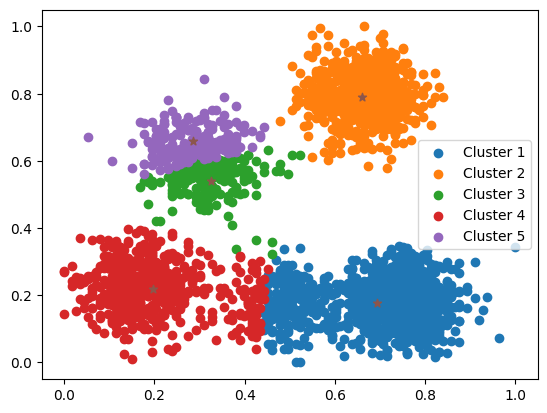

In [ ]:
plt.scatter(data1['Instagram visit score'], data1['Spending_rank(0 to 100)'], label='Cluster 1')
plt.scatter(data2['Instagram visit score'], data2['Spending_rank(0 to 100)'], label='Cluster 2')
plt.scatter(data3['Instagram visit score'], data3['Spending_rank(0 to 100)'], label='Cluster 3')
plt.scatter(data4['Instagram visit score'], data4['Spending_rank(0 to 100)'], label='Cluster 4')
plt.scatter(data5['Instagram visit score'], data5['Spending_rank(0 to 100)'], label='Cluster 5')
plt.scatter(center[:, 0], center[:, 1], marker='*')
plt.legend()
plt.show()